# Problem Statement

# Import all Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.metrics import recall_score,accuracy_score,f1_score,precision_score
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import zscore,skew

import json
import pickle
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
# credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
    
# purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", 
#                                   "smallbusiness", and "all_other").
    
# int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). 
#     Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
    
# installment: The monthly installments owed by the borrower if the loan is funded.
    
# log.annual.inc: The natural log of the self-reported annual income of the borrower.
    
# dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
    
# fico: The FICO credit score of the borrower.
    
# days.with.cr.line: The number of days the borrower has had a credit line.
    
# revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
    
# revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit 
#     available).
    
# inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
    
# delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
    
# pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# target_column = not_fully_paid

# Preprocessing

In [4]:
for x in df.columns:
    df.rename(columns={x:x.replace('.','_')},inplace=True)

In [5]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec', 'not_fully_paid'],
      dtype='object')

In [7]:
df.shape

(9578, 14)

In [8]:
df.isna().sum()

credit_policy        0
purpose              0
int_rate             0
installment          0
log_annual_inc       0
dti                  0
fico                 0
days_with_cr_line    0
revol_bal            0
revol_util           0
inq_last_6mths       0
delinq_2yrs          0
pub_rec              0
not_fully_paid       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe(include='all')

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
unique,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,debt_consolidation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,NaN,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int_rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log_annual_inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days_with_cr_line  9578 non-null   float64
 8   revol_bal          9578 non-null   int64  
 9   revol_util         9578 non-null   float64
 10  inq_last_6mths     9578 non-null   int64  
 11  delinq_2yrs        9578 non-null   int64  
 12  pub_rec            9578 non-null   int64  
 13  not_fully_paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<AxesSubplot:xlabel='not_fully_paid', ylabel='count'>

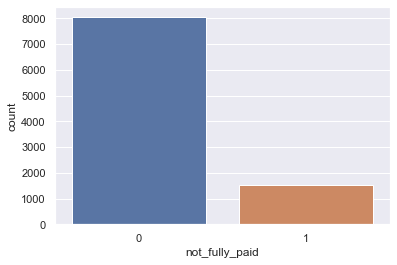

In [12]:
# Countplot for target variable
sns.countplot(df['not_fully_paid'])

In [13]:
df['not_fully_paid'].value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

In [14]:
(1533/(1533+8045))*100
# almost 16% percent have defaulted or not_fully_paid the installments
# Also data is biased oversampling may give good results

16.005429108373356

<AxesSubplot:>

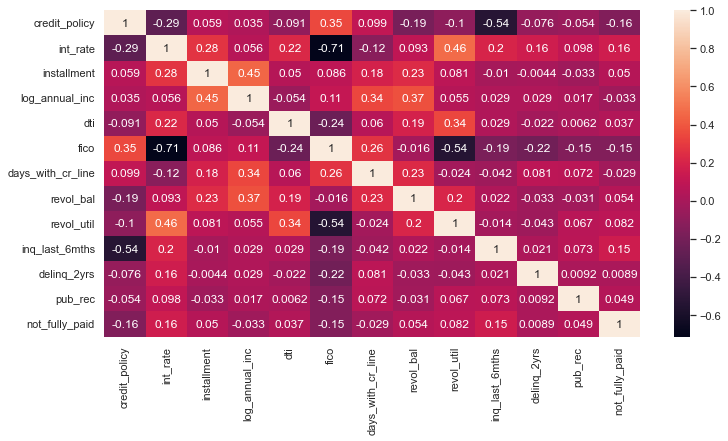

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [16]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

<AxesSubplot:xlabel='purpose', ylabel='count'>

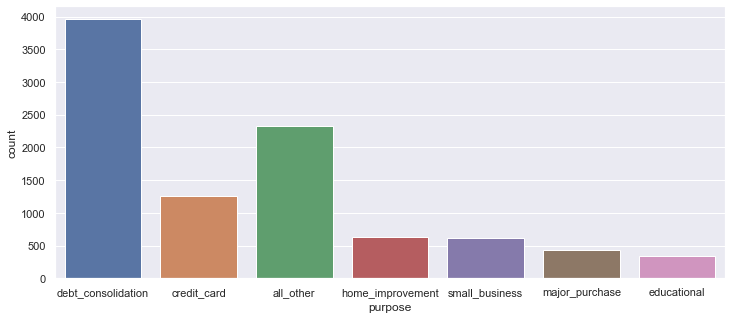

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(df['purpose'])
# from here we can see that debt_consolidation,credit_card are major reasons for loan.

In [18]:
df['purpose'].value_counts().to_dict()

{'debt_consolidation': 3957,
 'all_other': 2331,
 'credit_card': 1262,
 'home_improvement': 629,
 'small_business': 619,
 'major_purchase': 437,
 'educational': 343}

In [19]:
df.replace({'debt_consolidation': 1,
 'all_other': 2,
 'credit_card': 3,
 'home_improvement': 4,
 'small_business': 5,
 'major_purchase': 6,
 'educational': 7},inplace=True)

In [20]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,3,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,3,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


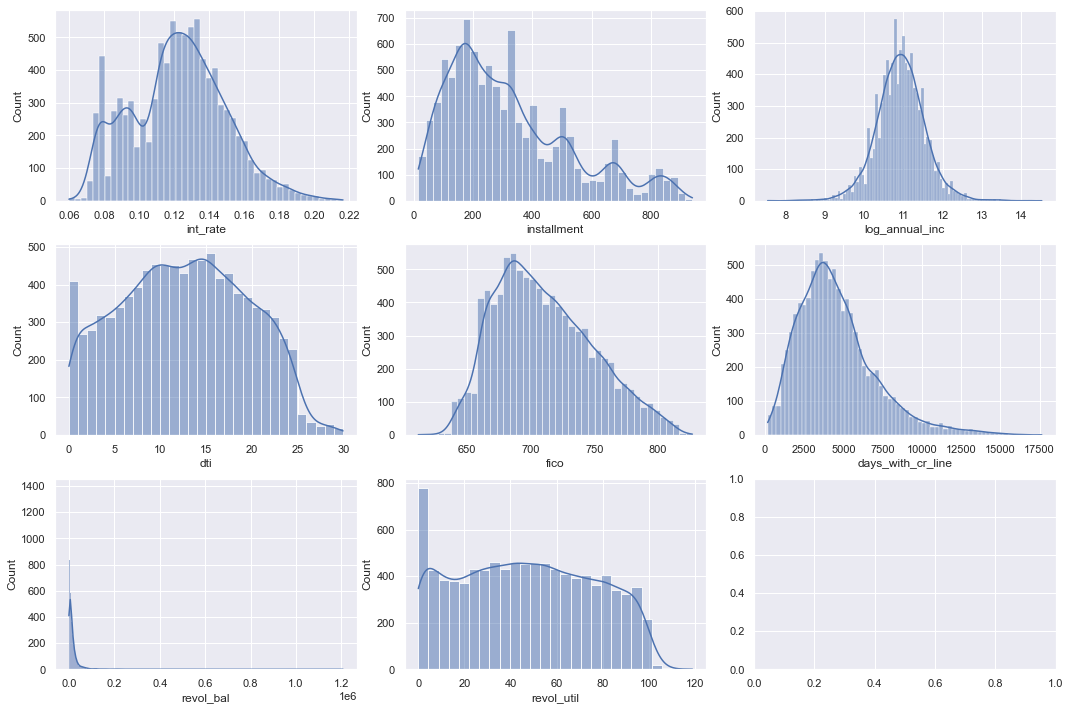

In [21]:
# Histogram for numerical columns

figure,axes = plt.subplots(3,3,figsize=(15,10))  # here axes is ndarray we flatten it means make it 1d
index=0
axes = axes.flatten()
temp =df.iloc[:,[2,3,4,5,6,7,8,9]]

for i in temp.columns:
    sns.histplot(df[i],kde=1,ax=axes[index])
    index+=1
    
plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=1)

## Log Transformation 

In [22]:
# When the data sample follows the power law distribution, we can use log scaling to transform the right skewed 
# distribution into normal distribution

# log_var = ['installment','days_with_cr_line','revol_bal']
# fig = plt.figure(figsize=(15,12))
# for i in range(len(log_var)):
#     var = log_var[i]
#     transformed = "log_" + var
#     df[transformed] = np.log10(df[var]+1)
    


In [23]:
# figure,axes = plt.subplots(1,3,figsize=(15,5))  # here axes is ndarray we flatten it means make it 1d
# index=0
# axes = axes.flatten()
# temp =df.loc[:,['installment','days_with_cr_line','revol_bal']]

# for i in temp.columns:
#     sns.histplot(df[i],kde=1,ax=axes[index])
#     index+=1
    
# plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=1)

In [24]:
# Tried with log transformation but no changes observed in distributions

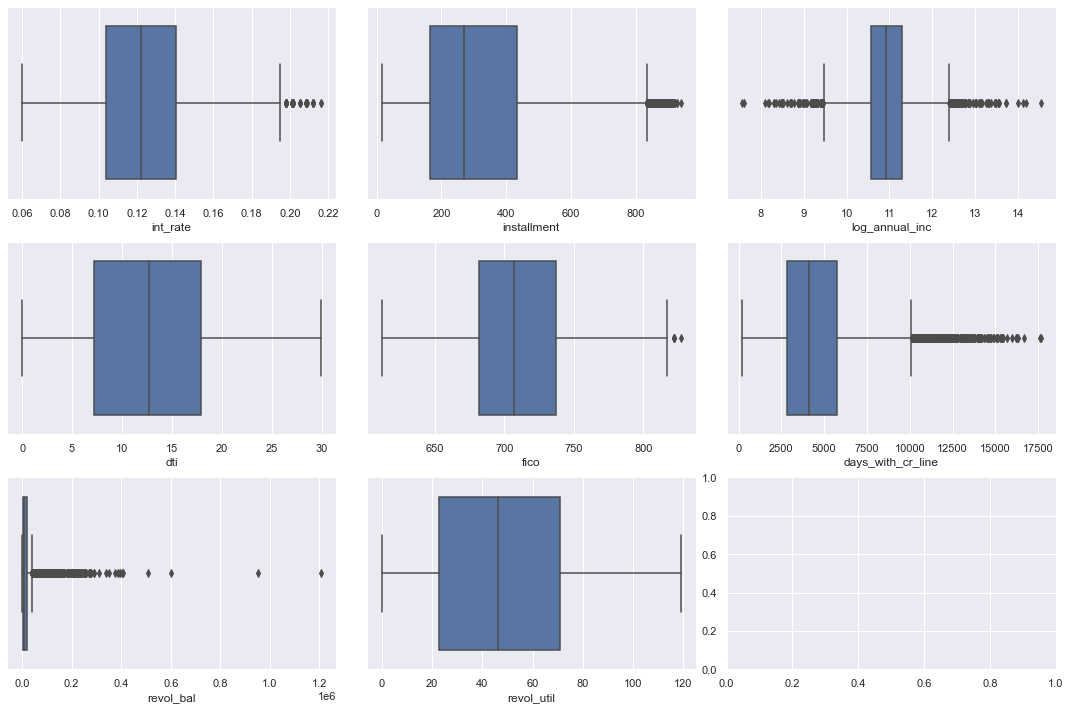

In [25]:
# Boxplot for numerical data

figure,axes = plt.subplots(3,3,figsize=(15,10))
index=0
axes = axes.flatten()
temp = df.iloc[:,[2,3,4,5,6,7,8,9]]

for i in temp.columns:
    sns.boxplot(df[i],ax=axes[index])
    index+=1
plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=1)

# There are outliers in some of the features, we can plot the histograms and check the distributions of the data if they are
# skewed or normally distributed, if skewed we can go for the iqr method else if normally distributed we can go for 
# the median as mean is sensitive to outliers.

## BOXCOX Tranformation

<AxesSubplot:xlabel='installment', ylabel='Count'>

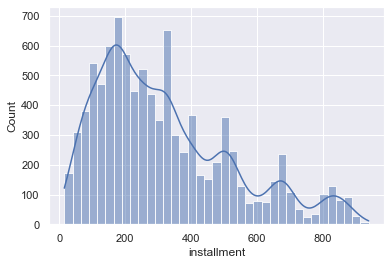

In [26]:
sns.histplot(df['installment'],kde=1)

<AxesSubplot:xlabel='installment'>

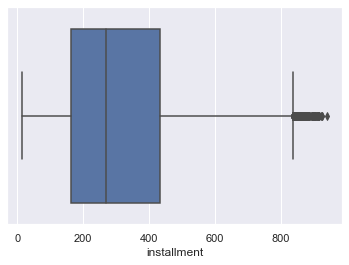

In [27]:
sns.boxplot(df['installment'])

<AxesSubplot:ylabel='Count'>

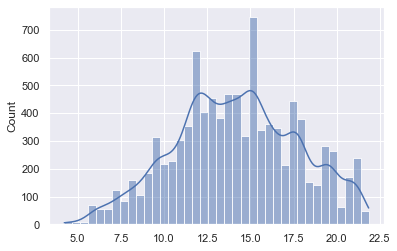

In [28]:
from scipy import stats
t_data = stats.boxcox(df['installment'])[0]
sns.histplot(t_data,kde=1)

<AxesSubplot:>

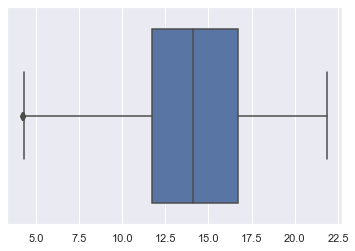

In [29]:
sns.boxplot(t_data)

In [30]:
# BoxCox is showing positive results but for now will go with other methods.

In [31]:
# for log_annual_income we will replace with median using zscore method
# others will be replaced by iqr method

In [32]:
## normal dist or symmetric  when   -0.5 < skew < 0.5

temp = df.iloc[:,[2,3,4,5,6,7,8,9]]
for i in temp.columns:
    skewness = skew(df[i])
    print(f"{i}: {skewness}")
    
# so int_rate,log_annual_inc,dti,fico,revol_util are normally distributed data

int_rate: 0.16439416280317964
installment: 0.9123795470488175
log_annual_inc: 0.028663616694390843
dti: 0.02393727340906256
fico: 0.47118593325420144
days_with_cr_line: 1.1555672187692227
revol_bal: 11.15931049753884
revol_util: 0.05997604792027563


In [33]:
z_score_values = np.abs(zscore(df['int_rate']))
outliers_index = np.where(z_score_values >= 1.5)[0]
outliers_list = df['int_rate'][outliers_index]
# outliers_list
len(outliers_list)

1465

In [34]:
df['int_rate'].describe() # here zscore will not show true explanation bcz of standardization

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int_rate, dtype: float64

In [35]:
# >1 method
# # median = df['int_rate'].median() > this median is considering the outliers not right method

# median = df.loc[zscore(df['int_rate'])<=1.5,'int_rate'].median()  # excluding the outliers here less than sign

# df['int_rate'] = np.where(np.abs(zscore(df['int_rate']))>=1.5,median,df['int_rate'])

In [36]:
# 2 method

# we can do it for remaining features whose histograms are normally distributed also then and have outliers:
# so int_rate,log_annual_inc,fico, are normally distributed data

median = df.loc[zscore(df['int_rate'])<=1.5,'int_rate'].median()
df.loc[zscore(df['int_rate'])>=1.5,'int_rate'] = np.nan
df.fillna(median,inplace=True)

median = df.loc[zscore(df['log_annual_inc'])<=1.5,'log_annual_inc'].median()
df.loc[zscore(df['log_annual_inc'])>=1.5,'log_annual_inc'] = np.nan
df.fillna(median,inplace=True)


median = df.loc[zscore(df['fico'])<=1.5,'fico'].median()
df.loc[zscore(df['fico'])>=1.5,'fico'] = np.nan
df.fillna(median,inplace=True)


In [37]:
# lowerside outliers
median = 10.89

df.loc[zscore(df['log_annual_inc'])<= -1.5,'log_annual_inc'] = np.nan
df.fillna(median,inplace=True)

In [38]:
# we can use iqr method for the skewed distributions having outliers

def tails(col_name):
    iqr = df[col_name].quantile(0.75) - df[col_name].quantile(0.25)
    upper_tail = df[col_name].quantile(0.75) + (iqr*1.5)
    lower_tail = df[col_name].quantile(0.25) - (iqr*1.5)
    print(f"{col_name} upper tail: {upper_tail}")
    print(f"{col_name} lower tail: {lower_tail}")
    
tails('installment')
tails('days_with_cr_line')
tails('revol_bal')

installment upper tail: 836.2512499999999
installment lower tail: -239.71874999999991
days_with_cr_line upper tail: 10095.0
days_with_cr_line lower tail: -1545.0
revol_bal upper tail: 40843.25
revol_bal lower tail: -19406.75


In [39]:
def upper_replace(df,variable,top):
    return np.where(df[variable]>top,top,df[variable])

df['installment'] = upper_replace(df,'installment',836.25)
df['days_with_cr_line'] = upper_replace(df,'days_with_cr_line',10095)
df['revol_bal'] = upper_replace(df,'revol_bal',40843.25)

def lower_replace(df,variable,bottom):
    return np.where(df[variable]<bottom,bottom,df[variable])


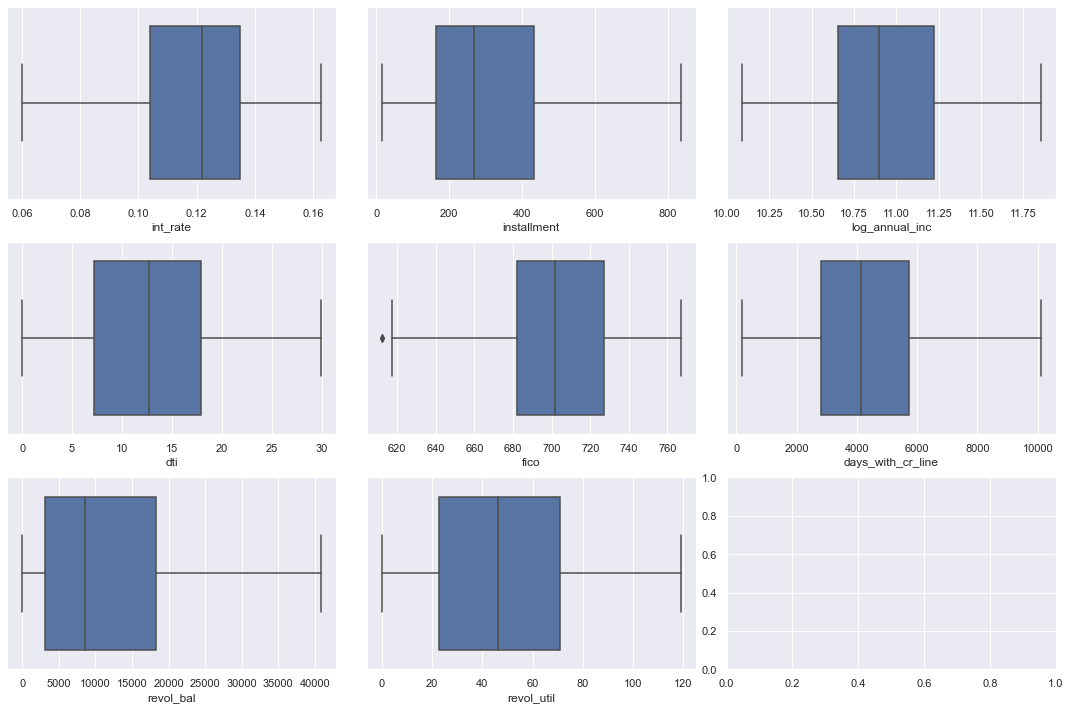

In [40]:
figure,axes = plt.subplots(3,3,figsize=(15,10))
index=0
axes = axes.flatten()
temp = df.iloc[:,[2,3,4,5,6,7,8,9]]

for i in temp.columns:
    sns.boxplot(df[i],ax=axes[index])
    index+=1
plt.tight_layout(h_pad=0.5,w_pad=0.5,pad=1)


In [41]:
df

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,1,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.00,52.1,0,0,0,0
1,1,3,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.00,76.7,0,0,0,0
2,1,1,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.00,25.6,1,0,0,0
3,1,1,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.00,73.2,1,0,0,0
4,1,3,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.00,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,2,0.1461,344.76,10.896739,10.39,672.0,10095.000000,40843.25,82.1,2,0,0,1
9574,0,2,0.1253,257.70,11.141862,0.21,722.0,4380.000000,184.00,1.1,5,0,0,1
9575,0,1,0.1071,97.81,10.596635,13.09,687.0,3450.041667,10036.00,82.9,8,0,0,1
9576,0,4,0.1600,351.58,10.819778,19.18,692.0,1800.000000,0.00,3.2,5,0,0,1


In [42]:
# grouping data based on target column
df.groupby(df['not_fully_paid']).mean()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
not_fully_paid,,,,,,,,,,,,,
0,0.832318,2.381479,0.117655,313.971753,10.939423,12.494413,705.234307,4520.119158,12508.685208,45.759608,1.433934,0.161591,0.056557
1,0.661448,2.530985,0.125815,341.211866,10.902336,13.195838,694.997391,4334.654979,13679.745923,52.255075,2.330724,0.174821,0.091324


# Model Traning & Evaluation

## Logistic Regression

In [43]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [44]:
# Checking the split
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7662, 13), (1916, 13), (7662,), (1916,))

In [45]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [46]:
# Testing data evaluation

y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_pred,y_test)
print("Confusion matrix: \n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: ",accuracy)
print('*'*50)
clf_report = classification_report(y_pred,y_test)
print("Classification report: \n",clf_report)

Confusion matrix: 
 [[1602  303]
 [   7    4]]
**************************************************
Accuracy:  0.8382045929018789
**************************************************
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      1905
           1       0.01      0.36      0.03        11

    accuracy                           0.84      1916
   macro avg       0.50      0.60      0.47      1916
weighted avg       0.99      0.84      0.91      1916



In [47]:
# Training data evaluation

y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:\n",accuracy)
print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("Classificatio Report:\n",clf_report)

Confusion Matrix:
 [[6414   22]
 [1210   16]]
**************************************************
Accuracy:
 0.8392064735056121
**************************************************
Classificatio Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6436
           1       0.42      0.01      0.03      1226

    accuracy                           0.84      7662
   macro avg       0.63      0.50      0.47      7662
weighted avg       0.77      0.84      0.77      7662



In [48]:
# A low F1 score tells you (almost) nothing — it only tells you about performance at a threshold. Low recall means we didnt 
# try to do well on very much of the entire test set. 

## logistic_model_using_feature_scaling

### Normalization

In [49]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [50]:
normal_scaler = MinMaxScaler()
normal_scaler.fit(x_train)  # for storing min max values
array = normal_scaler.transform(x_train)
normal_train_xdf = pd.DataFrame(array,columns=x_train.columns)
normal_train_xdf.head(2)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1.0,0.000000,0.642996,0.225901,0.126375,0.664887,0.387097,0.163385,0.078618,0.657983,0.060606,0.0,0.0
1,1.0,0.166667,0.390078,0.172634,0.415675,0.321095,0.677419,0.296513,0.283498,0.310924,0.060606,0.0,0.0


In [51]:
log_normal_model = LogisticRegression()
log_normal_model.fit(normal_train_xdf,y_train)

LogisticRegression()

In [52]:
# Testing data evaluation

array = normal_scaler.transform(x_test)
normal_test_xdf = pd.DataFrame(array,columns=x_test.columns)
y_pred = log_normal_model.predict(normal_test_xdf)

cnf_matrix = confusion_matrix(y_pred,y_test)
print("Confusion matrix: \n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: ",accuracy)
print('*'*50)
clf_report = classification_report(y_pred,y_test)
print("Classification report: \n",clf_report)

Confusion matrix: 
 [[1603  305]
 [   6    2]]
**************************************************
Accuracy:  0.8376826722338204
**************************************************
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      1908
           1       0.01      0.25      0.01         8

    accuracy                           0.84      1916
   macro avg       0.50      0.55      0.46      1916
weighted avg       0.99      0.84      0.91      1916



In [53]:
# Training data evaluation

y_pred_train = log_normal_model.predict(normal_train_xdf)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:\n",accuracy)
print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("Classificatio Report:\n",clf_report)

Confusion Matrix:
 [[6424   12]
 [1210   16]]
**************************************************
Accuracy:
 0.8405116157661185
**************************************************
Classificatio Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6436
           1       0.57      0.01      0.03      1226

    accuracy                           0.84      7662
   macro avg       0.71      0.51      0.47      7662
weighted avg       0.80      0.84      0.77      7662



In [54]:
# A low recall score (<0.5) means your classifier has a high number of False negatives which can be an outcome of 
# imbalanced class or untuned model hyperparameters

# In an imbalanced class problem, you have to prepare your data beforehand with Over/Under-Sampling or Focal Loss in order 
# to curb FP/FN

### Standardization

In [55]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [56]:
std_scaler = StandardScaler()
std_scaler.fit(x_train) # storing std,mean values
array = std_scaler.transform(x_train)
std_train_xdf = pd.DataFrame(array,columns=x_train.columns)
std_train_xdf.head(2)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,0.491747,-0.842320,0.326884,-0.579298,-1.565849,1.059042,-1.070445,-1.184569,-0.774587,1.088994,0.192019,-0.29877,-0.235369
1,0.491747,-0.251686,-0.832556,-0.791083,-0.288244,-0.430671,0.435477,-0.609960,-0.092082,-0.332526,0.192019,-0.29877,-0.235369


In [57]:
log_std_model = LogisticRegression()
log_std_model.fit(std_train_xdf,y_train)

LogisticRegression()

In [58]:
# Testing data evaluation

array = normal_scaler.transform(x_test)
std_test_xdf = pd.DataFrame(array,columns=x_test.columns)
y_pred = log_std_model.predict(std_test_xdf)

cnf_matrix = confusion_matrix(y_pred,y_test)
print("Confusion matrix: \n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_pred,y_test)
print("Accuracy: ",accuracy)
print('*'*50)
clf_report = classification_report(y_pred,y_test)
print("Classification report: \n",clf_report)

Confusion matrix: 
 [[1609  307]
 [   0    0]]
**************************************************
Accuracy:  0.8397703549060542
**************************************************
Classification report: 
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      1916
           1       0.00      0.00      0.00         0

    accuracy                           0.84      1916
   macro avg       0.50      0.42      0.46      1916
weighted avg       1.00      0.84      0.91      1916



In [59]:
# Training data evaluation

y_pred_train = log_std_model.predict(std_train_xdf)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy:\n",accuracy)
print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("Classificatio Report:\n",clf_report)

Confusion Matrix:
 [[6415   21]
 [1206   20]]
**************************************************
Accuracy:
 0.8398590446358654
**************************************************
Classificatio Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6436
           1       0.49      0.02      0.03      1226

    accuracy                           0.84      7662
   macro avg       0.66      0.51      0.47      7662
weighted avg       0.79      0.84      0.77      7662



### Logistic model with oversampling

In [60]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']

smt = SMOTE()
x,y = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [61]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12872, 13), (3218, 13), (12872,), (3218,))

In [62]:
log_oversampled_model = LogisticRegression()
log_oversampled_model.fit(x_train,y_train)

LogisticRegression()

In [63]:
## Testing Data Evaluation

y_pred = log_oversampled_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)


Confusion Matrix :
 [[951 658]
 [708 901]]
********************************************************************************
Accuracy : 0.5755127408328155
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.57      0.59      0.58      1609
           1       0.58      0.56      0.57      1609

    accuracy                           0.58      3218
   macro avg       0.58      0.58      0.58      3218
weighted avg       0.58      0.58      0.58      3218



In [64]:
## Training Data Evaluation 

y_pred_train = log_oversampled_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[3790 2646]
 [2767 3669]]
********************************************************************************
Accuracy : 0.579474829086389
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.58      0.59      0.58      6436
           1       0.58      0.57      0.58      6436

    accuracy                           0.58     12872
   macro avg       0.58      0.58      0.58     12872
weighted avg       0.58      0.58      0.58     12872



### Logistic model with undersampling

In [65]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']

under_sampler = RandomUnderSampler()
x,y = under_sampler.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [66]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((2452, 13), (614, 13), (2452,), (614,))

In [67]:
log_undersampled_model = LogisticRegression()
log_undersampled_model.fit(x_train,y_train)

LogisticRegression()

In [68]:
## Testing Data Evaluation

y_pred = log_undersampled_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)


Confusion Matrix :
 [[206 101]
 [147 160]]
********************************************************************************
Accuracy : 0.5960912052117264
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.58      0.67      0.62       307
           1       0.61      0.52      0.56       307

    accuracy                           0.60       614
   macro avg       0.60      0.60      0.59       614
weighted avg       0.60      0.60      0.59       614



In [69]:
## Training Data Evaluation 

y_pred_train = log_undersampled_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[783 443]
 [554 672]]
********************************************************************************
Accuracy : 0.5933931484502447
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.59      0.64      0.61      1226
           1       0.60      0.55      0.57      1226

    accuracy                           0.59      2452
   macro avg       0.59      0.59      0.59      2452
weighted avg       0.59      0.59      0.59      2452



### Logistic model optimum 

In [70]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)
logistic_model_opt = LogisticRegression()
logistic_model_opt.fit(x_train,y_train)
y_pred = logistic_model_opt.predict(x_test)

In [71]:
y_pred_prob = logistic_model_opt.predict_proba(x_train)
print(y_pred_prob)
fpr,tpr,thresh = roc_curve(y_train,y_pred_prob[:,1])

[[0.80952811 0.19047189]
 [0.87642398 0.12357602]
 [0.85661731 0.14338269]
 ...
 [0.84685927 0.15314073]
 [0.9102879  0.0897121 ]
 [0.78405985 0.21594015]]


In [72]:
# Finding the optimal threshold value
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresh[optimal_idx]
optimal_threshold

0.15901277378143877

In [73]:
# cutoff point > specificity == sensitivity

i = np.arange(len(tpr))
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),\
                    'tpr' : pd.Series(tpr, index = i),\
                    '1-fpr' : pd.Series(1-fpr, index = i),\
                    'tf' : pd.Series(tpr - (1-fpr), index = i),\
                    'thresholds' : pd.Series(thresh, index = i)})

roc.iloc[(roc.tf-0).abs().argsort()[:1]]


,fpr,tpr,1-fpr,tf,thresholds
1106,0.397296,0.602773,0.602704,0.00007,0.153214


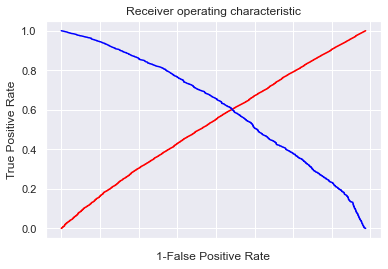

In [74]:
# Plot tpr vs 1-fpr to find the optimum threshold

fig, ax = plt.subplots()
plt.plot(roc['tpr'], color = 'red')
plt.plot(roc['1-fpr'], color = 'blue')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
ax.set_xticklabels([])# no values on x axis as all we want y valus
plt.show()

In [75]:
auc_value = auc(fpr,tpr)
print("Area under the roc curve: ",auc_value)

Area under the roc curve:  0.6461894350396475


In [76]:
df['predict'] = np.zeros(df.shape[0])
x = df.drop(['not_fully_paid','predict'],axis=1)
pred = logistic_model.predict(x)
df.loc[pred>optimal_threshold,'predict'] = 1
classification = classification_report(df['predict'],df['not_fully_paid'])
print("classification report: \n",classification)

classification report: 
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91      9529
         1.0       0.01      0.41      0.03        49

    accuracy                           0.84      9578
   macro avg       0.50      0.62      0.47      9578
weighted avg       0.99      0.84      0.91      9578



In [77]:
df.drop(['predict'],axis=1,inplace=True)

In [78]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,1,0.1189,829.10,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0,0,0,0
1,1,3,0.1071,228.22,11.082143,14.29,707.0,2760.000000,33623.0,76.7,0,0,0,0
2,1,1,0.1357,366.86,10.373491,11.63,682.0,4710.000000,3511.0,25.6,1,0,0,0
3,1,1,0.1008,162.34,11.350407,8.10,712.0,2699.958333,33667.0,73.2,1,0,0,0
4,1,3,0.1426,102.92,11.299732,14.97,667.0,4066.000000,4740.0,39.5,0,1,0,0


In [79]:
x = df.drop('not_fully_paid',axis=1)
y = df['not_fully_paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)
opt_log_model = LogisticRegression()
opt_log_model.fit(x_train,y_train)

LogisticRegression()

In [80]:
# Test data evaluation

y_pred_test = opt_log_model.predict(x_test)

x_test['y_pred'] = np.zeros(x_test.shape[0])
x_test.loc[y_pred_test > optimal_threshold,'y_pred'] = 1
report_test = classification_report(x_test['y_pred'],y_test)
print("Classification Report: \n",report_test)

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91      1905
         1.0       0.01      0.36      0.03        11

    accuracy                           0.84      1916
   macro avg       0.50      0.60      0.47      1916
weighted avg       0.99      0.84      0.91      1916



In [81]:
# Train data evaluation
y_pred_train_testing  =  opt_log_model.predict(x_train)

x_train['y_pred_train'] = np.zeros(x_train.shape[0])
x_train.loc[y_pred_train_testing > optimal_threshold,'y_pred_train'] = 1
report_test = classification_report(x_train['y_pred_train'],y_train)
print("Classification Report: \n",report_test)

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.84      0.91      7624
         1.0       0.01      0.42      0.03        38

    accuracy                           0.84      7662
   macro avg       0.50      0.63      0.47      7662
weighted avg       0.99      0.84      0.91      7662



## Logistic Optimal model oversampled

In [82]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']

smt = SMOTE()
x,y = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [83]:
opt_log_model_oversampled = LogisticRegression()
opt_log_model_oversampled.fit(x_train,y_train)

LogisticRegression()

In [84]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12872, 13), (3218, 13), (12872,), (3218,))

In [85]:
# Test data evaluation

y_pred_test = opt_log_model_oversampled.predict(x_test)

x_test['y_pred'] = np.zeros(x_test.shape[0])
x_test.loc[y_pred_test > optimal_threshold,'y_pred'] = 1
report_test = classification_report(x_test['y_pred'],y_test)
print("Classification Report: \n",report_test)


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.65      0.58      0.61      1826
         1.0       0.52      0.60      0.56      1392

    accuracy                           0.59      3218
   macro avg       0.59      0.59      0.58      3218
weighted avg       0.60      0.59      0.59      3218



In [86]:
# Train data evaluation
y_pred_train_testing  =  opt_log_model.predict(x_train)

x_train['y_pred_train'] = np.zeros(x_train.shape[0])
x_train.loc[y_pred_train_testing > optimal_threshold,'y_pred_train'] = 1
report_test = classification_report(x_train['y_pred_train'],y_train)
print("Classification Report: \n",report_test)

Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.50      0.67     12806
         1.0       0.01      0.67      0.01        66

    accuracy                           0.50     12872
   macro avg       0.50      0.58      0.34     12872
weighted avg       0.99      0.50      0.66     12872



# KNN Model

In [87]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [88]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [89]:
# Testing Data Evaluation

y_pred = knn_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_test,y_pred)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_test,y_pred)
print("accuracy: ",acc)

confusion matrix: 
 [[1570   39]
 [ 294   13]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.84      0.98      0.90      1609
           1       0.25      0.04      0.07       307

    accuracy                           0.83      1916
   macro avg       0.55      0.51      0.49      1916
weighted avg       0.75      0.83      0.77      1916

**************************************************
accuracy:  0.8262004175365344


In [90]:
# Training Data Evaluation

y_pred_train = knn_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_train,y_pred_train)
print("accuracy: ",acc)

confusion matrix: 
 [[6328  108]
 [1045  181]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      6436
           1       0.63      0.15      0.24      1226

    accuracy                           0.85      7662
   macro avg       0.74      0.57      0.58      7662
weighted avg       0.82      0.85      0.81      7662

**************************************************
accuracy:  0.8495170973636126


## Knn_hyperparamter_Tuning

In [91]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [92]:
knn_hyper_model = KNeighborsClassifier()

hyperparameters = {"n_neighbors":np.arange(3,31),
                  "p":[1,2]}
gscv_knn_hyper_model = GridSearchCV(knn_hyper_model,hyperparameters,cv=5)
gscv_knn_hyper_model.fit(x_train,y_train)
gscv_knn_hyper_model.best_estimator_

# by default p=2 eucledian distance

KNeighborsClassifier(n_neighbors=16, p=1)

In [93]:
# Testing Data Evaluation

knn_hyper_model = gscv_knn_hyper_model.best_estimator_
y_pred = knn_hyper_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix: \n",cnf_matrix)
print('*'*50)
clf_report = classification_report(y_test,y_pred)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_test,y_pred)
print("accuracy: ",acc)

confusion matrix: 
 [[1608    1]
 [ 307    0]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.00      0.00      0.00       307

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916

**************************************************
accuracy:  0.8392484342379958


In [94]:
# Training  Data Evaluation:

y_pred_train = knn_hyper_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix: \n",cnf_matrix)
print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_train,y_pred_train)
print("accuracy: ",acc)

confusion matrix: 
 [[6436    0]
 [1226    0]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6436
           1       0.00      0.00      0.00      1226

    accuracy                           0.84      7662
   macro avg       0.42      0.50      0.46      7662
weighted avg       0.71      0.84      0.77      7662

**************************************************
accuracy:  0.839989558861916


## KNN_model_with_oversampling and hyperparamter tuning

In [95]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']

smt = SMOTE()
x,y = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [96]:
knn_oversampled_hyper_model = KNeighborsClassifier()

hyperparameters = {"n_neighbors":np.arange(3,31),
                  "p":[1,2]}
gscv_knn_hyper_model = GridSearchCV(knn_oversampled_hyper_model,hyperparameters,cv=5)
gscv_knn_hyper_model.fit(x_train,y_train)
gscv_knn_hyper_model.best_estimator_

# by default p=2 eucledian distance

KNeighborsClassifier(n_neighbors=3, p=1)

In [97]:
# Testing Data Evaluation

knn_oversampled_hyper_model = gscv_knn_hyper_model.best_estimator_
y_pred = knn_oversampled_hyper_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix: \n",cnf_matrix)
print('*'*50)
clf_report = classification_report(y_test,y_pred)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_test,y_pred)
print("accuracy: ",acc)

confusion matrix: 
 [[1039  570]
 [ 154 1455]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.74      1609
           1       0.72      0.90      0.80      1609

    accuracy                           0.78      3218
   macro avg       0.79      0.78      0.77      3218
weighted avg       0.79      0.78      0.77      3218

**************************************************
accuracy:  0.7750155376009944


In [98]:
# Training  Data Evaluation:

y_pred_train = knn_oversampled_hyper_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix: \n",cnf_matrix)
print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_train,y_pred_train)
print("accuracy: ",acc)

confusion matrix: 
 [[5140 1296]
 [ 199 6237]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87      6436
           1       0.83      0.97      0.89      6436

    accuracy                           0.88     12872
   macro avg       0.90      0.88      0.88     12872
weighted avg       0.90      0.88      0.88     12872

**************************************************
accuracy:  0.8838564325668117


## Knn_Alternate_method

In [99]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [100]:
train_accuracy_list = []
test_accuracy_list = []

for i in range(3,31):
    knn_clf_model = KNeighborsClassifier(n_neighbors=i,p=1)
    knn_clf_model.fit(x_train,y_train)
    y_pred_train = knn_clf_model.predict(x_train)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    train_accuracy_list.append(train_accuracy)
    
    y_pred = knn_clf_model.predict(x_test)
    test_accuracy = accuracy_score(y_test,y_pred)
    test_accuracy_list.append(test_accuracy)

print(train_accuracy_list)
print('*'*80)
print(test_accuracy_list)

[0.8728791438266771, 0.8504306969459671, 0.8487340120073088, 0.8429913860610807, 0.8435134429652832, 0.8418167580266249, 0.8418167580266249, 0.8412947011224223, 0.8411641868963717, 0.8402505873140172, 0.8407726442182197, 0.8406421299921691, 0.841425215348473, 0.839989558861916, 0.8402505873140172, 0.839989558861916, 0.8402505873140172, 0.839989558861916, 0.8401200730879665, 0.8401200730879665, 0.839989558861916, 0.8401200730879665, 0.8401200730879665, 0.839989558861916, 0.839989558861916, 0.839989558861916, 0.839989558861916, 0.839989558861916]
********************************************************************************
[0.7954070981210856, 0.8335073068893528, 0.8235908141962421, 0.8387265135699373, 0.8335073068893528, 0.8392484342379958, 0.8366388308977035, 0.8376826722338204, 0.837160751565762, 0.8402922755741128, 0.8387265135699373, 0.8392484342379958, 0.8387265135699373, 0.8392484342379958, 0.8387265135699373, 0.8397703549060542, 0.8397703549060542, 0.8397703549060542, 0.839770

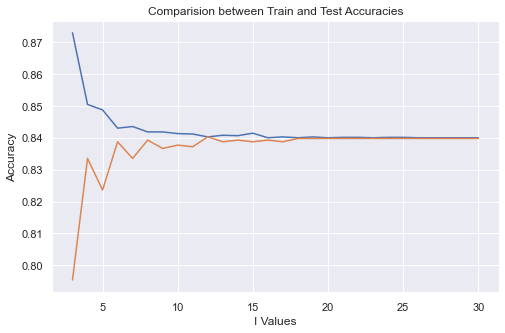

In [101]:
i_range = np.arange(3,31)
plt.figure(figsize=(8,5))
plt.plot(i_range,train_accuracy_list)
plt.plot(i_range,test_accuracy_list)
plt.xlabel('I Values')
plt.ylabel('Accuracy')
plt.title("Comparision between Train and Test Accuracies")
plt.savefig("I values Comparison.jpeg")

In [102]:
min_ele = train_accuracy_list[0]
max_ele = train_accuracy_list[0]

for i in range(1, len(train_accuracy_list)):
    if train_accuracy_list[i] < min_ele:
        min_ele = train_accuracy_list[i]
        
    if train_accuracy_list[i] > max_ele:
        max_ele = train_accuracy_list[i]
        
print("min element: ",min_ele)
print("max_element: ",max_ele)

min element:  0.839989558861916
max_element:  0.8728791438266771


In [103]:
train_accuracy_list.index(max(train_accuracy_list)) 

0

In [104]:
max(train_accuracy_list)

0.8728791438266771

In [105]:
test_accuracy_list.index(max(test_accuracy_list))

9

In [106]:
max(test_accuracy_list)

0.8402922755741128

In [107]:
train_accuracy_list[9]

0.8402505873140172

In [108]:
# So we wll put n_neig=9 to get optimum accuracies and reduce variance

In [109]:
knn_alt_model = KNeighborsClassifier(n_neighbors=9,p=1)
knn_alt_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [110]:
# Testing Data Evaluation

y_pred = knn_alt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_test,y_pred)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_test,y_pred)
print("accuracy: ",acc)

confusion matrix: 
 [[1598   11]
 [ 302    5]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.31      0.02      0.03       307

    accuracy                           0.84      1916
   macro avg       0.58      0.50      0.47      1916
weighted avg       0.76      0.84      0.77      1916

**************************************************
accuracy:  0.8366388308977035


In [111]:
# Training Data Evaluation

y_pred_train = knn_alt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_train,y_pred_train)
print("accuracy: ",acc)

confusion matrix: 
 [[6409   27]
 [1185   41]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6436
           1       0.60      0.03      0.06      1226

    accuracy                           0.84      7662
   macro avg       0.72      0.51      0.49      7662
weighted avg       0.81      0.84      0.78      7662

**************************************************
accuracy:  0.8418167580266249


## Knn model with scaling, hyperparamter tuning and Oversampling:

### Normalization

In [112]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
smt = SMOTE()
x,y = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [113]:
normal_sclaer = MinMaxScaler()
normal_scaler.fit(x_train)
array = normal_scaler.transform(x_train)
normal_train_xdf = pd.DataFrame(array,columns=x_train.columns)
normal_train_xdf.head(2)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1.0,0.333333,0.706183,0.441768,0.328878,0.677192,0.836544,0.345782,0.355174,0.391346,0.060606,0.0,0.0
1,1.0,0.000000,0.606585,0.102553,0.130860,0.332789,0.578894,0.489945,0.132991,0.720409,0.060606,0.0,0.0


In [114]:
knn_normal_model_wt_hyper_oversampled = KNeighborsClassifier()
knn_normal_model_wt_hyper_oversampled.fit(normal_train_xdf,y_train)

KNeighborsClassifier()

In [115]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12872, 13), (3218, 13), (12872,), (3218,))

In [116]:
# Testing Data Evaluation

array = normal_scaler.transform(x_test)
normal_test_xdf = pd.DataFrame(array,columns=x_test.columns)
y_pred = knn_normal_model_wt_hyper_oversampled.predict(normal_test_xdf)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_test,y_pred)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_test,y_pred)
print("accuracy: ",acc)

confusion matrix: 
 [[1002  607]
 [ 209 1400]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.83      0.62      0.71      1609
           1       0.70      0.87      0.77      1609

    accuracy                           0.75      3218
   macro avg       0.76      0.75      0.74      3218
weighted avg       0.76      0.75      0.74      3218

**************************************************
accuracy:  0.7464263517712865


In [117]:
# Training Data Evaluation

y_pred_train = knn_normal_model_wt_hyper_oversampled.predict(normal_train_xdf)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_train,y_pred_train)
print("accuracy: ",acc)

confusion matrix: 
 [[4734 1702]
 [ 389 6047]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      6436
           1       0.78      0.94      0.85      6436

    accuracy                           0.84     12872
   macro avg       0.85      0.84      0.84     12872
weighted avg       0.85      0.84      0.84     12872

**************************************************
accuracy:  0.8375543816034804


# Decision Tree Model

In [118]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [119]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [120]:
# Testing Data Evaluation
y_pred = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_test,y_pred)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_test,y_pred)
print("accuracy: ",acc)

confusion matrix: 
 [[1331  278]
 [ 248   59]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      1609
           1       0.18      0.19      0.18       307

    accuracy                           0.73      1916
   macro avg       0.51      0.51      0.51      1916
weighted avg       0.74      0.73      0.73      1916

**************************************************
accuracy:  0.7254697286012526


In [121]:
# Training Data Evaluation

y_pred_train = dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_train,y_pred_train)
print("accuracy: ",acc)

confusion matrix: 
 [[6436    0]
 [   0 1226]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      1226

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

**************************************************
accuracy:  1.0


In [122]:
# plot decision tree

# plt.figure(figsize=(50,50))
# plot_tree(dt_model,feature_names=x.columns,class_names=['0','1'],filled=True)
# plt.savefig("Decision_Tree_Default.png")

<AxesSubplot:>

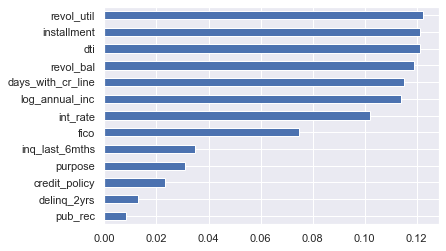

In [123]:
#  feature importance
array = dt_model.feature_importances_
# np.sum(array)
s1 = pd.Series(array,index=x.columns)
s1.sort_values().plot(kind="barh")

## Decision tree hyperparamter tuning

In [124]:
dt_model_hyper = DecisionTreeClassifier()

hyperparameters = {"criterion":['gini','entropy'],
                  "max_depth":np.arange(3,8),
                  "min_samples_split":np.arange(2,20),
                  "min_samples_leaf":np.arange(2,15)}

gscv_dt_model_hyper = GridSearchCV(dt_model_hyper,hyperparameters,cv=5)
gscv_dt_model_hyper.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6, 7]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [125]:
gscv_dt_model_hyper.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2)

In [126]:
# Testing Data Evaluation

dt_model_hyper = gscv_dt_model_hyper.best_estimator_
y_pred = dt_model_hyper.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_test,y_pred)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_test,y_pred)
print("accuracy: ",acc)

confusion matrix: 
 [[1609    0]
 [ 307    0]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.00      0.00      0.00       307

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916

**************************************************
accuracy:  0.8397703549060542


In [127]:
# Training Data Evaluation

y_pred_train = dt_model_hyper.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_train,y_pred_train)
print("accuracy: ",acc)

confusion matrix: 
 [[6436    0]
 [1226    0]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6436
           1       0.00      0.00      0.00      1226

    accuracy                           0.84      7662
   macro avg       0.42      0.50      0.46      7662
weighted avg       0.71      0.84      0.77      7662

**************************************************
accuracy:  0.839989558861916


## Decision tree hyperparamter tuning & oversampling

In [128]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
smt = SMOTE()
x,y = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [129]:
dt_model_hyper_oversampled = DecisionTreeClassifier()

hyperparameters = {"criterion":['gini','entropy'],
                  "max_depth":np.arange(3,8),
                  "min_samples_split":np.arange(2,20),
                  "min_samples_leaf":np.arange(2,15)}

rscv_dt_model_hyper = RandomizedSearchCV(dt_model_hyper,hyperparameters,cv=5)
rscv_dt_model_hyper.fit(x_train,y_train)
rscv_dt_model_hyper.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8,
                       min_samples_split=7)

In [130]:
# Testing Data Evaluation

dt_model_hyper_oversampled = rscv_dt_model_hyper.best_estimator_
y_pred = dt_model_hyper.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_test,y_pred)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_test,y_pred)
print("accuracy: ",acc)

confusion matrix: 
 [[1609    0]
 [1609    0]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      1609
           1       0.00      0.00      0.00      1609

    accuracy                           0.50      3218
   macro avg       0.25      0.50      0.33      3218
weighted avg       0.25      0.50      0.33      3218

**************************************************
accuracy:  0.5


In [131]:
# Training Data Evaluation

y_pred_train = dt_model_hyper_oversampled.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_train,y_pred_train)
print("accuracy: ",acc)

confusion matrix: 
 [[5685  751]
 [3246 3190]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.64      0.88      0.74      6436
           1       0.81      0.50      0.61      6436

    accuracy                           0.69     12872
   macro avg       0.72      0.69      0.68     12872
weighted avg       0.72      0.69      0.68     12872

**************************************************
accuracy:  0.6894810441267868


## DT Pruning

In [132]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [133]:
dt_pruning_model = DecisionTreeClassifier()
dt_pruning_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [134]:
# Cost Complexity Pruning Path:

result = dt_pruning_model.cost_complexity_pruning_path(x_train,y_train)
# result
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 8.49378297e-05, 8.52337803e-05, 8.52337803e-05,
       8.56283811e-05, 8.63297224e-05, 8.65678115e-05, 8.67242070e-05,
       9.90569511e-05, 9.90577898e-05, 1.01247400e-04, 1.02829390e-04,
       1.04411381e-04, 1.08761855e-04, 1.08761855e-04, 1.10500007e-04,
       1.11869337e-04, 1.11869337e-04, 1.15159611e-04, 1.16012645e-04,
       1.16012645e-04, 1.17462803e-04, 1.17462803e-04, 1.17462803e-04,
       1.17462803e-04, 1.17462803e-04, 1.17462803e-04, 1.17849194e-04,
       1.18649296e-04, 1.18649296e-04, 1.18649296e-04, 1.18649296e-04,
       1.18649296e-04, 1.18649296e-04, 1.18998265e-04, 1.19638041e-04,
       1.19638041e-04, 1.19638041e-04, 1.19638041e-04, 1.19638041e-04,
       1.20474670e-04, 1.20474670e-04, 1.20474670e-04, 1.20474670e-04,
       1.20474670e-04, 1.20474670e-04, 1.20474670e-04, 1.21191781e-04,
       1.21191781e-04, 1.21813278e-04, 1.21813278e-04, 1.21813278e-04,
       1.21813278e-04, 1.21813278e-04, 1.21813278e-04, 1.22357087e-04,
      

In [135]:
train_accuracy_list = []
test_accuracy_list = []

for ccp_alpha in ccp_alpha_list:
    dt_pruning_model = DecisionTreeClassifier(random_state=24,ccp_alpha=ccp_alpha)
    dt_pruning_model.fit(x_train, y_train)
    train_accuracy_list.append(dt_pruning_model.score(x_train, y_train))
    test_accuracy_list.append(dt_pruning_model.score(x_test, y_test))

# train_accuracy_list
# test_accuracy_list

In [136]:
np.where(test_accuracy_list==np.max(test_accuracy_list))

(array([445, 446, 447, 448, 449, 450], dtype=int64),)

In [137]:
print(test_accuracy_list[445])

0.8397703549060542


In [138]:
ccp_alpha_list[445]

0.0006264626148736643

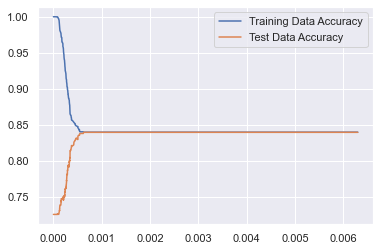

In [139]:
fig,ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Test Data Accuracy")
ax.legend()

In [140]:
dt_pruning_model = DecisionTreeClassifier(random_state=24,ccp_alpha=ccp_alpha_list[445])
dt_pruning_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0006264626148736643, random_state=24)

In [141]:
# Testing Data Evaluation
y_pred = dt_pruning_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_test,y_pred)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_test,y_pred)
print("accuracy: ",acc)

confusion matrix: 
 [[1609    0]
 [ 307    0]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.00      0.00      0.00       307

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916

**************************************************
accuracy:  0.8397703549060542


In [142]:
# Training Data Evaluation

y_pred_train = dt_pruning_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("confusion matrix: \n",cnf_matrix)

print('*'*50)
clf_report = classification_report(y_train,y_pred_train)
print("classification report:\n",clf_report)
print('*'*50)
acc = accuracy_score(y_train,y_pred_train)
print("accuracy: ",acc)

confusion matrix: 
 [[6436    0]
 [1226    0]]
**************************************************
classification report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6436
           1       0.00      0.00      0.00      1226

    accuracy                           0.84      7662
   macro avg       0.42      0.50      0.46      7662
weighted avg       0.71      0.84      0.77      7662

**************************************************
accuracy:  0.839989558861916


# Random Forest Model

In [143]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [144]:
## Testing Data Evaluation

y_pred = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)


Confusion Matrix :
 [[1598   11]
 [ 300    7]]
********************************************************************************
Accuracy : 0.8376826722338204
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.39      0.02      0.04       307

    accuracy                           0.84      1916
   macro avg       0.62      0.51      0.48      1916
weighted avg       0.77      0.84      0.77      1916



In [145]:
## Training Data Evaluation 

y_pred_train = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[6436    0]
 [   0 1226]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      1226

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662



## Random Forest with hyperparamter tuning

In [146]:
rf_hyper_model = RandomForestClassifier()
hyperparamters = {"n_estimators":np.arange(10,200),
                 "criterion": ['gini','entropy'],
                 "max_depth": np.arange(3,8),
                 "min_samples_split":np.arange(4,20),
                 "min_samples_leaf":np.arange(3,10),
                 "oob_score":[True],
                 "random_state":[24]}
rscv_rf_hyper_model = RandomizedSearchCV(rf_hyper_model,hyperparamters,cv=5)
rscv_rf_hyper_model.fit(x_train,y_train)
rscv_rf_hyper_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=4,
                       min_samples_split=13, n_estimators=54, oob_score=True,
                       random_state=24)

In [147]:
## Testing Data Evaluation
rf_hyper_model = rscv_rf_hyper_model.best_estimator_
y_pred = rf_hyper_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[1609    0]
 [ 307    0]]
********************************************************************************
Accuracy : 0.8397703549060542
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      1609
           1       0.00      0.00      0.00       307

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



In [148]:
## Training Data Evaluation 

y_pred_train = rf_hyper_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[6436    0]
 [1217    9]]
********************************************************************************
Accuracy : 0.8411641868963717
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.84      1.00      0.91      6436
           1       1.00      0.01      0.01      1226

    accuracy                           0.84      7662
   macro avg       0.92      0.50      0.46      7662
weighted avg       0.87      0.84      0.77      7662



<AxesSubplot:>

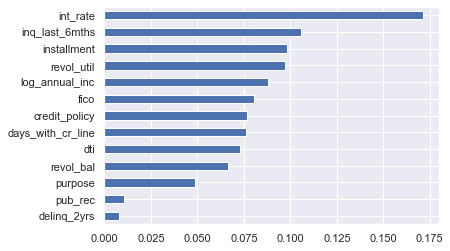

In [149]:
rf_hyper_model.feature_importances_
s1 = pd.Series(rf_hyper_model.feature_importances_,index=x.columns)
s1.sort_values().plot(kind='barh')

In [150]:
rf_hyper_model.oob_score_

0.839989558861916

## Random forest with sampling

In [151]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']

smt = SMOTE()
x,y = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [152]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((12872, 13), (3218, 13), (12872,), (3218,))

In [153]:
rf_oversampling_model = RandomForestClassifier()
rf_oversampling_model.fit(x_train, y_train)

RandomForestClassifier()

In [154]:
## Testing Data Evaluation

y_pred = rf_oversampling_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)


Confusion Matrix :
 [[1427  182]
 [ 226 1383]]
********************************************************************************
Accuracy : 0.8732131758856433
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1609
           1       0.88      0.86      0.87      1609

    accuracy                           0.87      3218
   macro avg       0.87      0.87      0.87      3218
weighted avg       0.87      0.87      0.87      3218



In [155]:
## Training Data Evaluation 

y_pred_train = rf_oversampling_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[6436    0]
 [   0 6436]]
********************************************************************************
Accuracy : 1.0
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      6436

    accuracy                           1.00     12872
   macro avg       1.00      1.00      1.00     12872
weighted avg       1.00      1.00      1.00     12872



## Random forest with hyperparamater tuning and oversampling

In [156]:
x = df.drop(['not_fully_paid'],axis=1)
y = df['not_fully_paid']

smt = SMOTE()
x,y = smt.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)

In [157]:
rf_hyper_oversampled_model = RandomForestClassifier()

hyperparamters = {"n_estimators":np.arange(10,200),
                 "criterion": ['gini','entropy'],
                 "max_depth": np.arange(3,8),
                 "min_samples_split":np.arange(4,20),
                 "min_samples_leaf":np.arange(3,10),
                 "oob_score":[True],
                 "random_state":[24]}
rscv_rf_hyper_model = RandomizedSearchCV(rf_hyper_model,hyperparamters,cv=5)
rscv_rf_hyper_model.fit(x_train,y_train)
rscv_rf_hyper_model.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=8, min_samples_split=12,
                       n_estimators=88, oob_score=True, random_state=24)

In [158]:
rf_hyper_oversampled_model = rscv_rf_hyper_model.best_estimator_

## Testing Data Evaluation

y_pred = rf_hyper_oversampled_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[1301  308]
 [ 517 1092]]
********************************************************************************
Accuracy : 0.7436295835922934
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.72      0.81      0.76      1609
           1       0.78      0.68      0.73      1609

    accuracy                           0.74      3218
   macro avg       0.75      0.74      0.74      3218
weighted avg       0.75      0.74      0.74      3218



In [159]:
## Training Data Evaluation 

y_pred_train = rf_hyper_oversampled_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)

print("*"*80)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)

print("*"*80)
clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

Confusion Matrix :
 [[5271 1165]
 [1912 4524]]
********************************************************************************
Accuracy : 0.7609540087010566
********************************************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.73      0.82      0.77      6436
           1       0.80      0.70      0.75      6436

    accuracy                           0.76     12872
   macro avg       0.76      0.76      0.76     12872
weighted avg       0.76      0.76      0.76     12872



## Comparision of metrics

In [160]:
model_metrics = pd.DataFrame(columns=['Precision_Score','Recall_Score','f1_Score','Accuracy_Score_Test',
                                      'Accuracy_Score_Train'])

list1 = ['logistic_model','log_normal_model','log_std_model','log_oversampled_model',
                                   'log_undersampled_model','opt_log_model','knn_model','knn_hyper_model',
                                   'knn_oversampled_hyper_model','knn_alt_model','knn_normal_model_wt_hyper_oversampled',
                                   'dt_model','dt_model_hyper','dt_model_hyper_oversampled','dt_pruning_model',
                                   'rf_model','rf_hyper_model','rf_oversampling_model','rf_hyper_oversampled_model']

model_metrics.insert(0,"ML_Models",list1)
model_metrics
model_metrics['Precision_Score'] = [0.013,0.01,0,0.59,0.6,0.01,0.25,0,0.72,0.31,0.70,0.17,0,0,0.2,0.47,0,0.88,0.77]

model_metrics['Recall_Score'] = [0.363,0.25,0,0.53,0.6,0.36,0.04,0,0.90,0.02,0.87,0.19,0,0,0,0.02,0,0.85,0.69]

model_metrics['f1_Score'] = [0.025,0.0126,0,0.56,0.6,0.03,0.07,0,0.80,0.03,0.78,0.18,0,0,0.01,0.04,0,0.87,0.73]

model_metrics['Accuracy_Score_Test'] = [0.838,0.837,0.839,0.58,0.596,0.84,0.826, 0.839,0.772,0.836,0.751,0.723,0.839,0.5,
                                       0.838,0.839,0.839,0.869,0.740]

model_metrics['Accuracy_Score_Train'] = [0.839,0.840,0.839,0.585,0.602,0.84,0.849,0.839,0.881,0.841,0.839,1.0,0.839,0.69,
                                        0.840,0.99,0.839,1.0,0.75]

model_metrics

# opt_log_model
# knn_normal_model_wt_hyper_oversampled
# dt_model
# rf_hyper_oversampled_model

,ML_Models,Precision_Score,Recall_Score,f1_Score,Accuracy_Score_Test,Accuracy_Score_Train
0,logistic_model,0.013,0.363,0.0250,0.838,0.839
1,log_normal_model,0.010,0.250,0.0126,0.837,0.840
2,log_std_model,0.000,0.000,0.0000,0.839,0.839
3,log_oversampled_model,0.590,0.530,0.5600,0.580,0.585
4,log_undersampled_model,0.600,0.600,0.6000,0.596,0.602
5,opt_log_model,0.010,0.360,0.0300,0.840,0.840
6,knn_model,0.250,0.040,0.0700,0.826,0.849
7,knn_hyper_model,0.000,0.000,0.0000,0.839,0.839
8,knn_oversampled_hyper_model,0.720,0.900,0.8000,0.772,0.881
9,knn_alt_model,0.310,0.020,0.0300,0.836,0.841


## BarPlots for comparisions

Text(0, 0.5, 'ML Models')

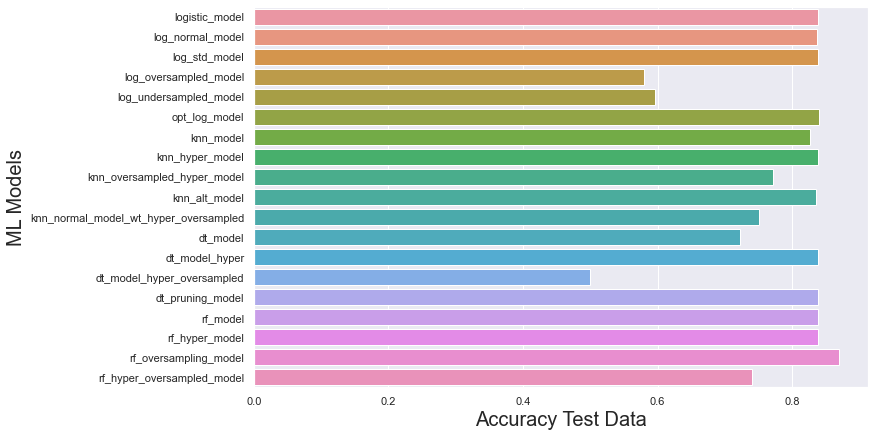

In [161]:
models = ['logistic_model','log_normal_model','log_std_model','log_oversampled_model',
                                   'log_undersampled_model','opt_log_model','knn_model','knn_hyper_model',
                                   'knn_oversampled_hyper_model','knn_alt_model','knn_normal_model_wt_hyper_oversampled',
                                   'dt_model','dt_model_hyper','dt_model_hyper_oversampled','dt_pruning_model',
                                   'rf_model','rf_hyper_model','rf_oversampling_model','rf_hyper_oversampled_model']

Accuracy_Score_Test = [0.838,0.837,0.839,0.58,0.596,0.84,0.826, 0.839,0.772,0.836,0.751,0.723,0.839,0.5,
                                       0.838,0.839,0.839,0.869,0.740]
plt.figure(figsize=(11,7))
ax=sns.barplot(y=models,x=Accuracy_Score_Test)
ax.set_xlabel('Accuracy Test Data',fontsize=20)
ax.set_ylabel('ML Models',fontsize=20)

### Best Algorithms from each one

In [166]:
model_metrics = pd.DataFrame(columns=['Precision_Score','Recall_Score','f1_Score','Accuracy_Score_Test',
                                      'Accuracy_Score_Train'])
list1 = ['opt_log_model','knn_normal_model_wt_hyper_oversampled', 'dt_model', 'rf_hyper_oversampled_model']

model_metrics.insert(0,"ML_Models",list1)

model_metrics['Precision_Score'] = [0.010,0.70,0.17,0.77]

model_metrics['Recall_Score'] = [0.36,0.87,0.19,0.69]

model_metrics['f1_Score'] = [0.03,0.78,0.18,0.73]

model_metrics['Accuracy_Score_Test'] = [0.84,0.751,0.723,0.740]

model_metrics['Accuracy_Score_Train'] = [0.840,0.839,1.0,0.750]

model_metrics

,ML_Models,Precision_Score,Recall_Score,f1_Score,Accuracy_Score_Test,Accuracy_Score_Train
0,opt_log_model,0.01,0.36,0.03,0.840,0.840
1,knn_normal_model_wt_hyper_oversampled,0.70,0.87,0.78,0.751,0.839
2,dt_model,0.17,0.19,0.18,0.723,1.000
3,rf_hyper_oversampled_model,0.77,0.69,0.73,0.740,0.750


<Figure size 792x504 with 0 Axes>

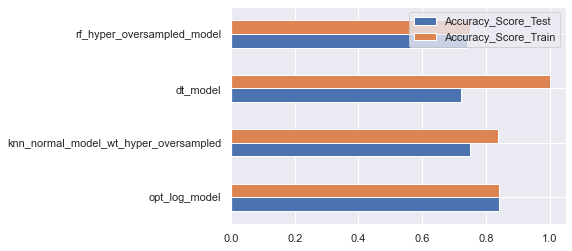

In [186]:
dict1 = {'Accuracy_Score_Test' : [0.84,0.751,0.723,0.740],'Accuracy_Score_Train' :[0.840,0.839,1.0,0.750]}

data = pd.DataFrame(dict1,columns=['Accuracy_Score_Test','Accuracy_Score_Train'],
                    index=['opt_log_model','knn_normal_model_wt_hyper_oversampled', 'dt_model', 'rf_hyper_oversampled_model'])

plt.figure(figsize=(11,7))
data.plot.barh()
plt.show()


In [187]:
# from the above comparision we can say that rf_hyper_oversampled_model is performing well at all paramters and also 
# overfitting is very less

In [188]:
# for this to work we have to separate scaled models and sampled models till that use above



# models = ['logistic_model','log_normal_model','log_std_model','log_oversampled_model',
#                                    'log_undersampled_model','opt_log_model','knn_model','knn_hyper_model',
#                                    'knn_oversampled_hyper_model','knn_alt_model','knn_normal_model_wt_hyper_oversampled',
#                                    'dt_model','dt_model_hyper','dt_model_hyper_oversampled','dt_pruning_model',
#                                    'rf_model','rf_hyper_model','rf_oversampling_model','rf_hyper_oversampled_model']


# def Compare_Accuracy(logistic_model,log_normal_model,log_std_model,log_oversampled_model,
#                                    log_undersampled_model,opt_log_model,knn_model,knn_hyper_model,
#                                    knn_oversampled_hyper_model,knn_alt_model,knn_normal_model_wt_hyper_oversampled,
#                                    dt_model,dt_model_hyper,dt_model_hyper_oversampled,dt_pruning_model,
#                                    rf_model,rf_hyper_model,rf_oversampling_model,rf_hyper_oversampled_model):

#     train_accuracy=[]
#     test_accuracy=[]
#     recall=[]
#     precision=[]
#     x = df.drop(['not_fully_paid'],axis=1)
#     y = df['not_fully_paid']
#     x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=24,stratify=y)
    
#     for i in [logistic_model,log_normal_model,log_std_model,log_oversampled_model,
#                                    log_undersampled_model,opt_log_model,knn_model,knn_hyper_model,
#                                    knn_oversampled_hyper_model,knn_alt_model,knn_normal_model_wt_hyper_oversampled,
#                                    dt_model,dt_model_hyper,dt_model_hyper_oversampled,dt_pruning_model,
#                                    rf_model,rf_hyper_model,rf_oversampling_model,rf_hyper_oversampled_model]:
        
        
#         y_pred_train=i.predict(x_train)
#         train_accuracy.append(accuracy_score(y_train,y_pred_train))
#         precision.append(precision_score(y_train,y_pred_train))
    
#         y_pred_test=i.predict(x_test)
#         test_accuracy.append(accuracy_score(y_test,y_pred_test))
#         recall.append(recall_score(y_test,y_pred_test))

#     accuracy_comp=pd.DataFrame({"train_accuracy":train_accuracy,
#                             "test_accuracy":test_accuracy,
#                             "recall":recall,
#                              "precision":precision},index=models)
#     return accuracy_comp
# Compare_Accuracy(logistic_model,log_normal_model,log_std_model,log_oversampled_model,
#                                    log_undersampled_model,opt_log_model,knn_model,knn_hyper_model,
#                                    knn_oversampled_hyper_model,knn_alt_model,knn_normal_model_wt_hyper_oversampled,
#                                    dt_model,dt_model_hyper,dt_model_hyper_oversampled,dt_pruning_model,
#                                    rf_model,rf_hyper_model,rf_oversampling_model,rf_hyper_oversampled_model)

## Testing on Single Row

In [189]:
x.columns

Index(['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec'],
      dtype='object')

In [190]:
df.head(1)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,1,0.1189,829.1,11.350407,19.48,737.0,5639.958333,28854.0,52.1,0,0,0,0


In [203]:
credit_policy = 1
purpose = 'debt_consolidation'
int_rate = 0.2189
installment = 829.1
log_annual_inc = 11.350
dti = 19.48
fico = 737
days_with_cr_line = 5639.95
revol_bal = 28854
revol_util = 52.1
inq_last_6mths = 0
delinq_2yrs = 0
pub_rec = 0

In [204]:
# For label encoded data
project_data = {'purpose':{'debt_consolidation': 1,'all_other': 2,'credit_card': 3,'home_improvement': 4,
                'small_business': 5,'major_purchase': 6, 'educational': 7},
               'columns':list(x.columns)}

In [205]:
test_array = np.zeros(x.shape[1],dtype=int)

test_array[0] = credit_policy
test_array[1] = project_data['purpose'][purpose]
test_array[2] = int_rate
test_array[3] = installment
test_array[4] = log_annual_inc
test_array[5] = dti
test_array[6] = fico
test_array[7] = days_with_cr_line
test_array[8] = revol_bal
test_array[9] = revol_util
test_array[10] = inq_last_6mths
test_array[11] = delinq_2yrs
test_array[12] = pub_rec

test_array

array([    1,     1,     0,   829,    11,    19,   737,  5639, 28854,
          52,     0,     0,     0])

In [206]:
model = rf_hyper_oversampled_model
model.predict([test_array])[0]

0

### Dump Data

In [207]:
with open("loan_model.pkl",'wb') as f:
    pickle.dump(model,f)

In [208]:
with open("project_data.json",'w') as f:
    json.dump(project_data,f)